# Importando las librerias a usar

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')

In [3]:
#Version of Libraries
print('numpy',np.__version__)
print('pandas',pd.__version__)

numpy 1.18.1
pandas 1.0.3


# Leyendo la data origen de JHU (Johns Hopkins University) CSSEGIS ( https://github.com/CSSEGISandData/COVID-19)

In [17]:
confirmed_df = pd.read_csv('./data/time_series_covid19_confirmed_global.csv', sep=',')
deaths_df = pd.read_csv('./data/time_series_covid19_deaths_global.csv', sep=',')
recoveries_df = pd.read_csv('./data/time_series_covid19_recovered_global.csv', sep=',')

confirmed_df_Peru =confirmed_df[confirmed_df['Country/Region']=='Peru']
deaths_df_Peru = deaths_df[deaths_df['Country/Region']=='Peru']
recoveries_df_Peru = recoveries_df[recoveries_df['Country/Region']=='Peru']

In [18]:
confirmed_df_Peru.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
181,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,950,1065,1323,1414,1595,1746,2281,2561,2954,4342


In [19]:
deaths_df_Peru.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
181,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,24,30,38,55,61,73,83,92,107,121


In [20]:
recoveries_df_Peru.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20
178,NaN,Peru,-9.19,-75.0152,0,0,0,0,0,0,...,53,394,394,537,537,914,989,997,1301,1333


In [21]:
cols = confirmed_df.keys()

cols_Peru = confirmed_df_Peru.keys()
print(cols_Peru)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20'],
      dtype='object')


# all over the world

In [22]:
#confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
#deaths = deaths_df.loc[:, cols[4]:cols[-1]]
#recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

## En Peru

In [35]:
confirmed_Peru = confirmed_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]
deaths_Peru = deaths_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]
recoveries_Peru = recoveries_df_Peru.loc[:, cols_Peru[48]:cols_Peru[-1]]
#confirmed_Peru = confirmed_df_Peru
#deaths_Peru = deaths_df_Peru
#recoveries_Peru = recoveries_df_Peru

In [36]:
#dates = confirmed.keys()
dates = confirmed_Peru.keys()

#world_cases = []
#total_deaths = [] 
#mortality_rate = []
#total_recovered = [] 

Peru_cases = []
Peru_total_deaths = [] 
Peru_mortality_rate = []
Peru_total_recovered = []

for i in dates:
#    confirmed_sum = confirmed[i].sum()
    Peru_confirmed_sum = confirmed_Peru[i].sum()
#    death_sum = deaths[i].sum()
    Peru_death_sum = deaths_Peru[i].sum()
#    recovered_sum = recoveries[i].sum()
    Peru_recovered_sum = recoveries_Peru[i].sum()
#    world_cases.append(confirmed_sum)
    Peru_cases.append(Peru_confirmed_sum)
#    total_deaths.append(death_sum)
    Peru_total_deaths.append(Peru_death_sum)
#    mortality_rate.append(death_sum/confirmed_sum)
    Peru_mortality_rate.append(Peru_death_sum/Peru_confirmed_sum)    
#    total_recovered.append(recovered_sum)
    Peru_total_recovered.append(Peru_recovered_sum)

In [37]:
days_since_3_06 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
#world_cases = np.array(world_cases).reshape(-1, 1)
#total_deaths = np.array(total_deaths).reshape(-1, 1)
#total_recovered = np.array(total_recovered).reshape(-1, 1)

Peru_cases = np.array(Peru_cases).reshape(-1, 1)
Peru_total_deaths = np.array(Peru_total_deaths).reshape(-1, 1)
Peru_total_recovered = np.array(Peru_total_recovered).reshape(-1, 1)

# Prediccion para 5 dias ( future forecasting 5 days)

In [38]:
days_in_future = 5
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-5]

Convert integer into datetime for better visualization

In [39]:
start = '3/06/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Train / test Split ( 80%, 20%= 0.20)

In [40]:
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

X_Peru_train_confirmed, X_Peru_test_confirmed, y_Peru_train_confirmed, y_Peru_test_confirmed = train_test_split(days_since_3_06, Peru_cases, test_size=0.20, shuffle=False)

# Modelos predictivos para # de casos confirmados. Estoy usanso SVM, Regresion Lineal y Bayes Ridge.
(Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example.)

SVM Model with Peru

In [41]:
kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_Peru_train_confirmed, np.ravel(y_Peru_train_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [42]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.01, 'C': 0.01}

In [43]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 514.8732812855307
MSE: 615423.2318582052


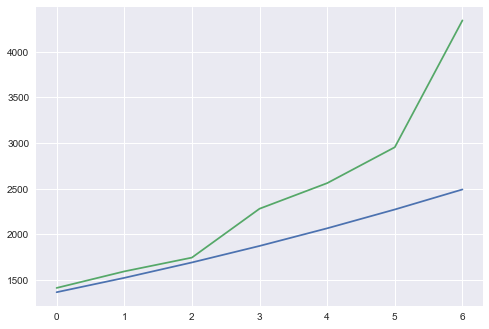

In [44]:
# check against testing data
svm_Peru_test_pred = svm_confirmed.predict(X_Peru_test_confirmed)
plt.plot(svm_Peru_test_pred)
plt.plot(y_Peru_test_confirmed)
print('MAE:', mean_absolute_error(svm_Peru_test_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(svm_Peru_test_pred, y_Peru_test_confirmed))

Linear Reggresion

In [45]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_Peru_train_confirmed, y_Peru_train_confirmed)
test_linear_pred = linear_model.predict(X_Peru_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_Peru_test_confirmed))


MAE: 1342.0795685795688
MSE: 2536863.543495663


In [46]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[43.34981685]]
[-229.28835979]


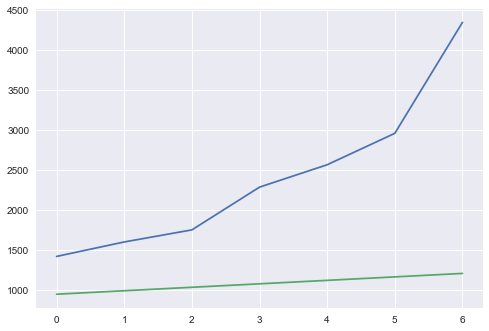

In [47]:
plt.plot(y_Peru_test_confirmed)
plt.plot(test_linear_pred)

Bayesian regresion Model

In [48]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_Peru_train_confirmed, np.ravel(y_Peru_train_confirmed))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [49]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-07,
 'lambda_1': 0.0001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-05}

In [50]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_Peru_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forecast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_Peru_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_Peru_test_confirmed))

MAE: 1347.2060683418895
MSE: 2551607.17780234


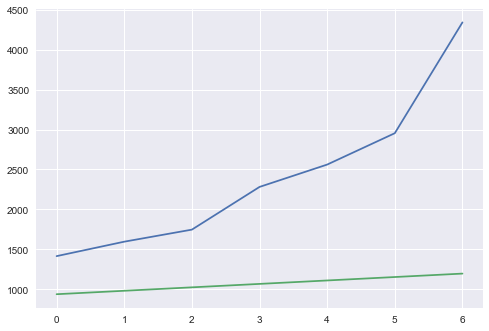

In [51]:
plt.plot(y_Peru_test_confirmed)
plt.plot(test_bayesian_pred)

# GRAFICAS ( graphs)

# Peru Cases Coronovirus CoViD-19 over time

# Usar 06 de marzo como dia inicial ( 1er caso detectado)

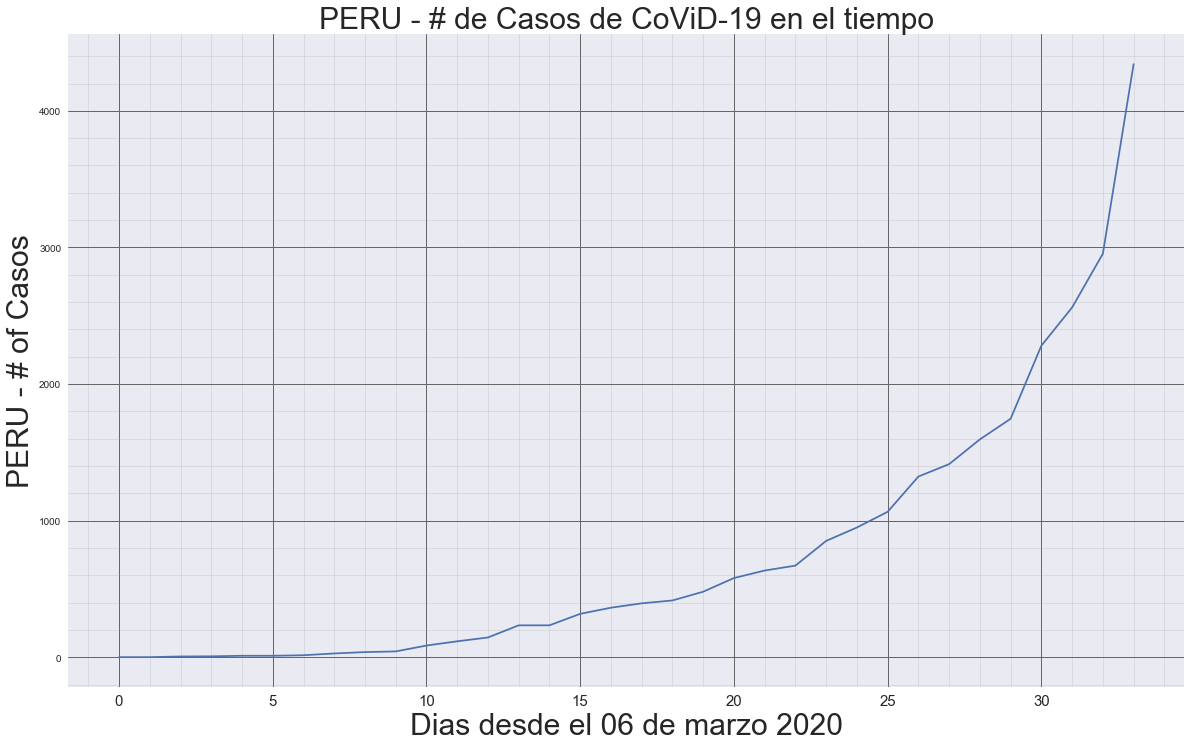

In [52]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.title('PERU - # de Casos de CoViD-19 en el tiempo', size=30)
plt.xlabel('Dias desde el 06 de marzo 2020', size=30)
plt.ylabel('PERU - # of Casos', size=30)
plt.xticks(size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

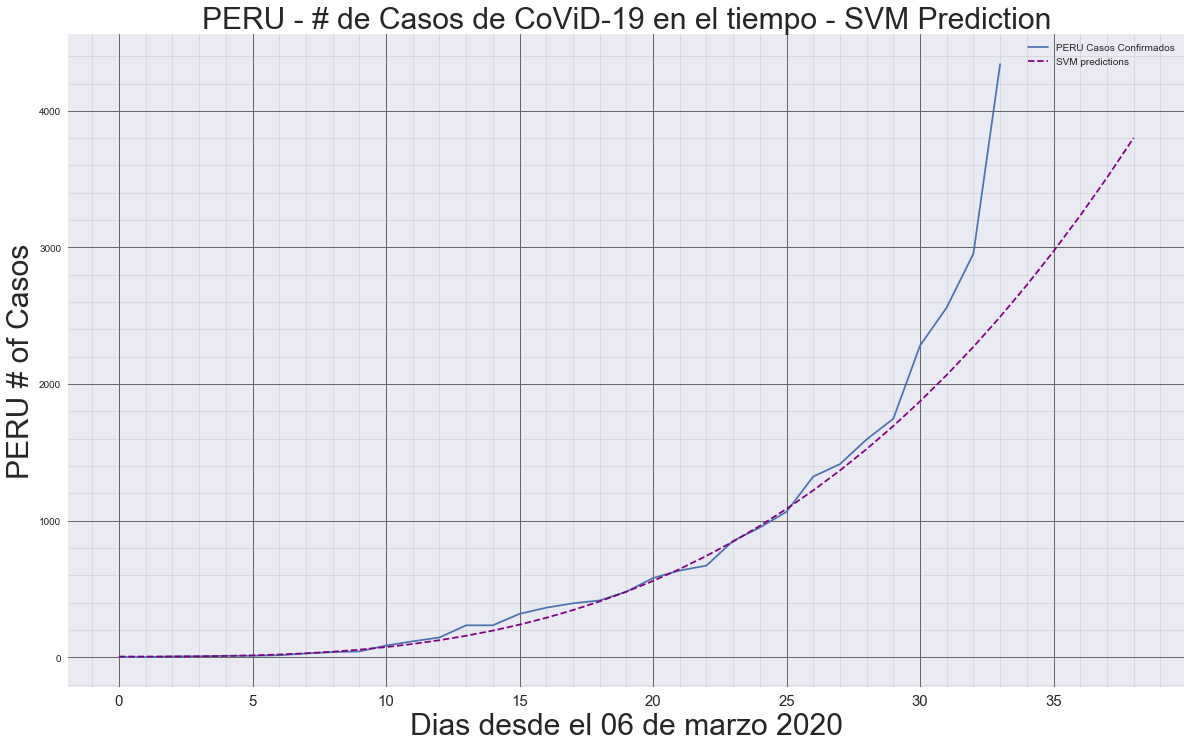

In [53]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('PERU - # de Casos de CoViD-19 en el tiempo - SVM Prediction', size=30)
plt.xlabel('Dias desde el 06 de marzo 2020', size=30)
plt.ylabel('PERU # of Casos', size=30)
plt.legend(['PERU Casos Confirmados', 'SVM predictions'])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(size=15)
plt.show()

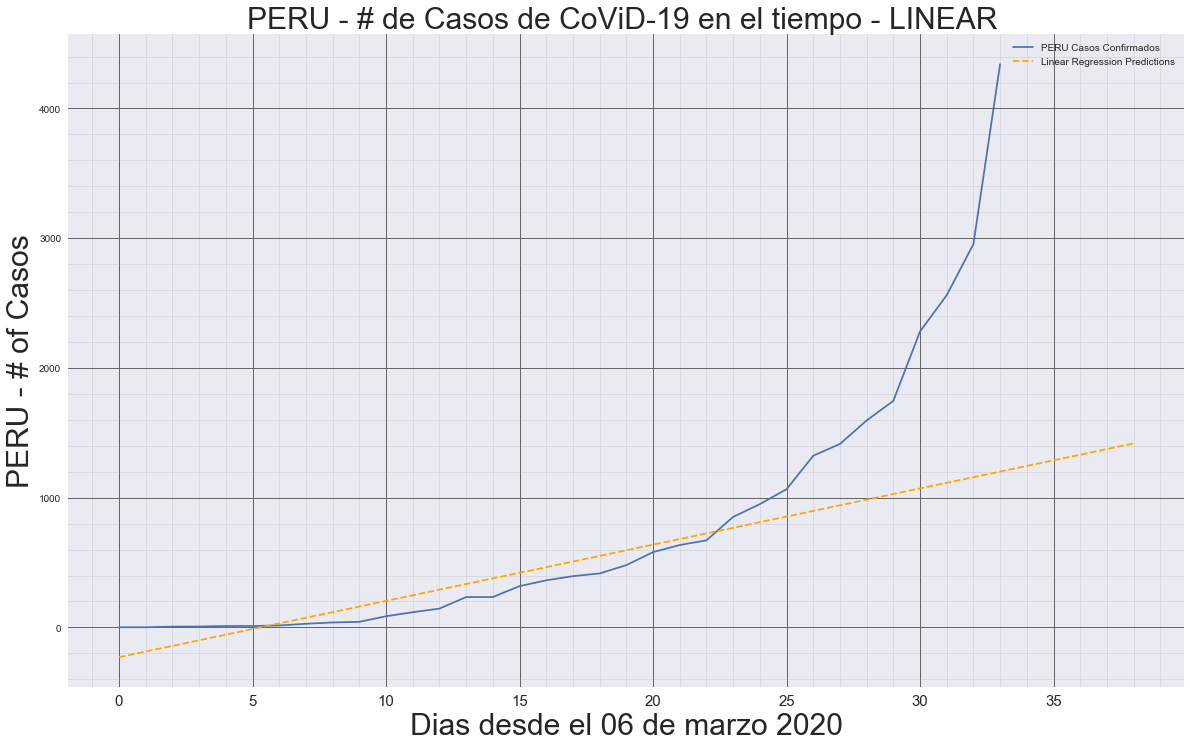

In [54]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('PERU - # de Casos de CoViD-19 en el tiempo - LINEAR ', size=30)
plt.xlabel('Dias desde el 06 de marzo 2020', size=30)
plt.ylabel('PERU - # of Casos', size=30)
plt.legend(['PERU Casos Confirmados', 'Linear Regression Predictions'])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(size=15)
plt.show()

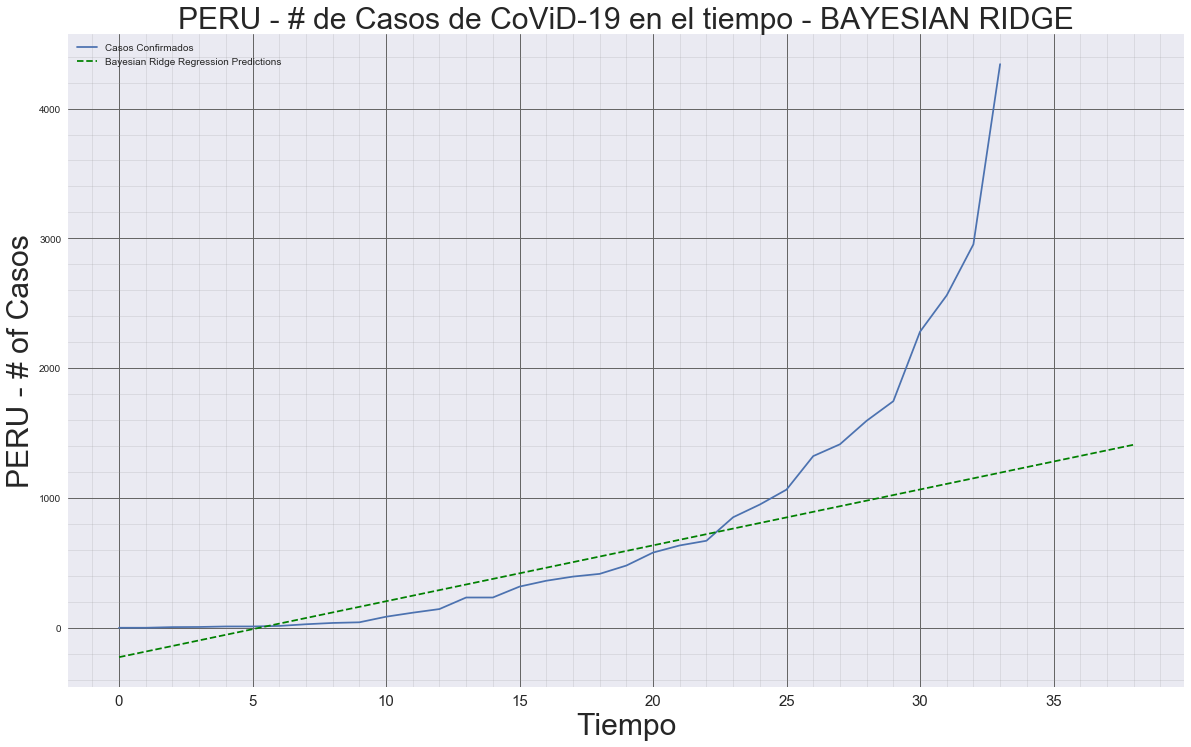

In [55]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(future_forecast, bayesian_pred, linestyle='dashed', color='green')
plt.title('PERU - # de Casos de CoViD-19 en el tiempo - BAYESIAN RIDGE', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('PERU - # of Casos', size=30)
plt.legend(['Casos Confirmados', 'Bayesian Ridge Regression Predictions'])
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(size=15)
plt.show()

# Predicciones (Future predictions) :

In [56]:
# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forecast_dates[-5:], svm_pred[-5:]))

SVM future predictions:


{('04/09/2020', 2724.781790301206),
 ('04/10/2020', 2971.8485162658703),
 ('04/11/2020', 3233.444509229294),
 ('04/12/2020', 3509.9848911057366),
 ('04/13/2020', 3801.8847838094357)}

In [57]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forecast_dates[-5:], bayesian_pred[-5:]))

Ridge regression future predictions:


{('04/09/2020', 1238.2726781048991),
 ('04/10/2020', 1281.3209361451677),
 ('04/11/2020', 1324.3691941854363),
 ('04/12/2020', 1367.417452225705),
 ('04/13/2020', 1410.4657102659735)}

In [58]:
# Future predictions using Linear Regression 
print('Linear regression future predictions:')
print(linear_pred[-5:])

Linear regression future predictions:
[[1244.60541311]
 [1287.95522996]
 [1331.30504681]
 [1374.65486365]
 [1418.0046805 ]]


# Graphing the number of confirmed cases, deaths, and the mortality rate over time, as well as the number of recoveries

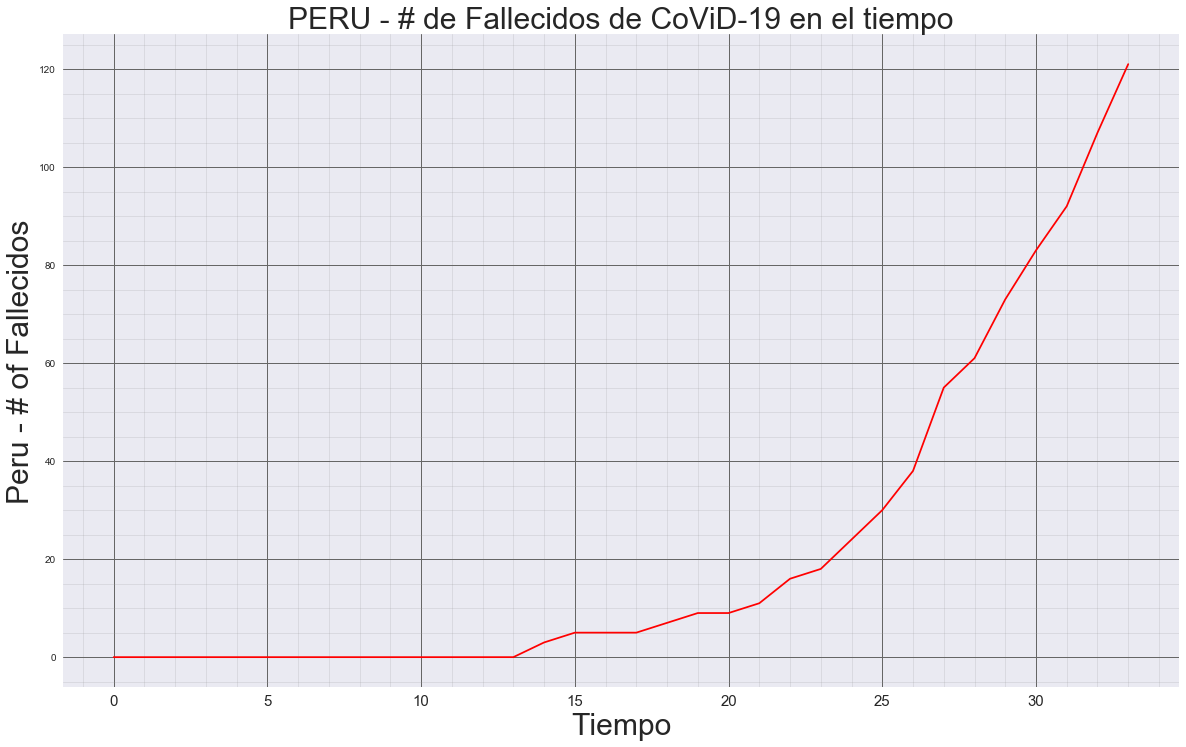

In [59]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_deaths, color='red')
plt.title('PERU - # de Fallecidos de CoViD-19 en el tiempo', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('Peru - # of Fallecidos', size=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(size=15)
plt.show()

Mortality

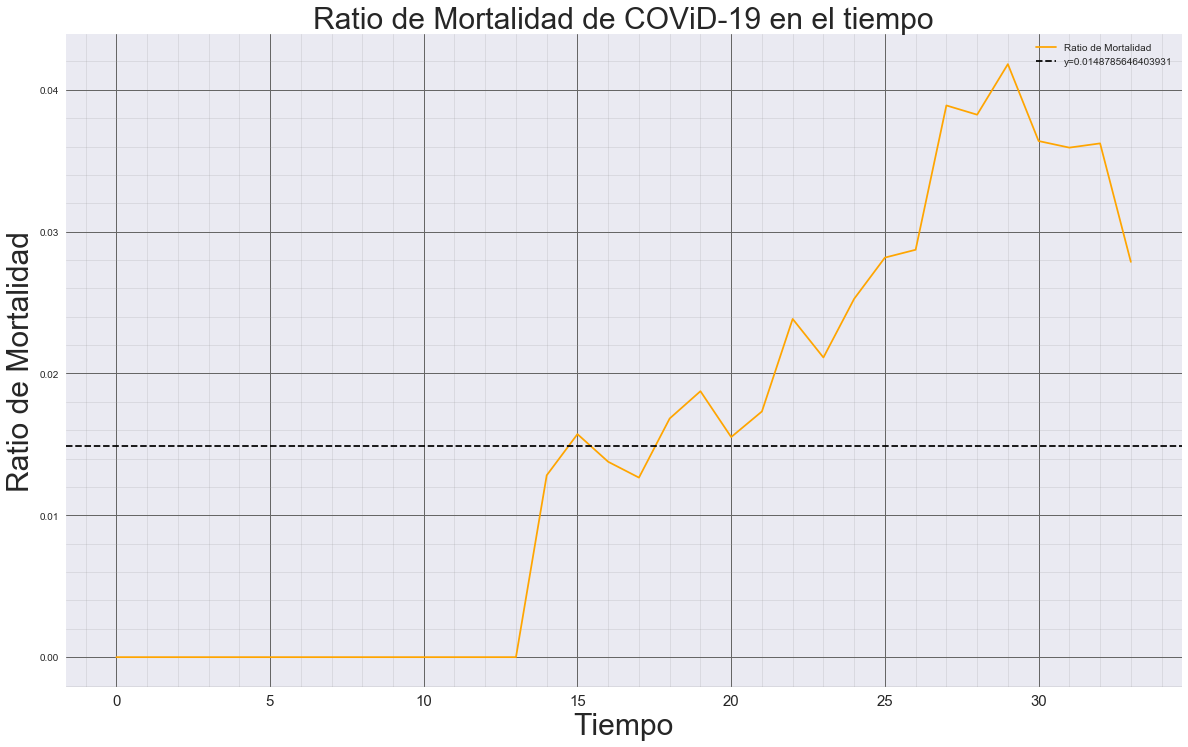

In [60]:
mean_mortality_rate = np.mean(Peru_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Ratio de Mortalidad de COViD-19 en el tiempo', size=30)
plt.legend(['Ratio de Mortalidad', 'y='+str(mean_mortality_rate)])
plt.xlabel('Tiempo', size=30)
plt.ylabel('Ratio de Mortalidad', size=30)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(size=15)
plt.show()

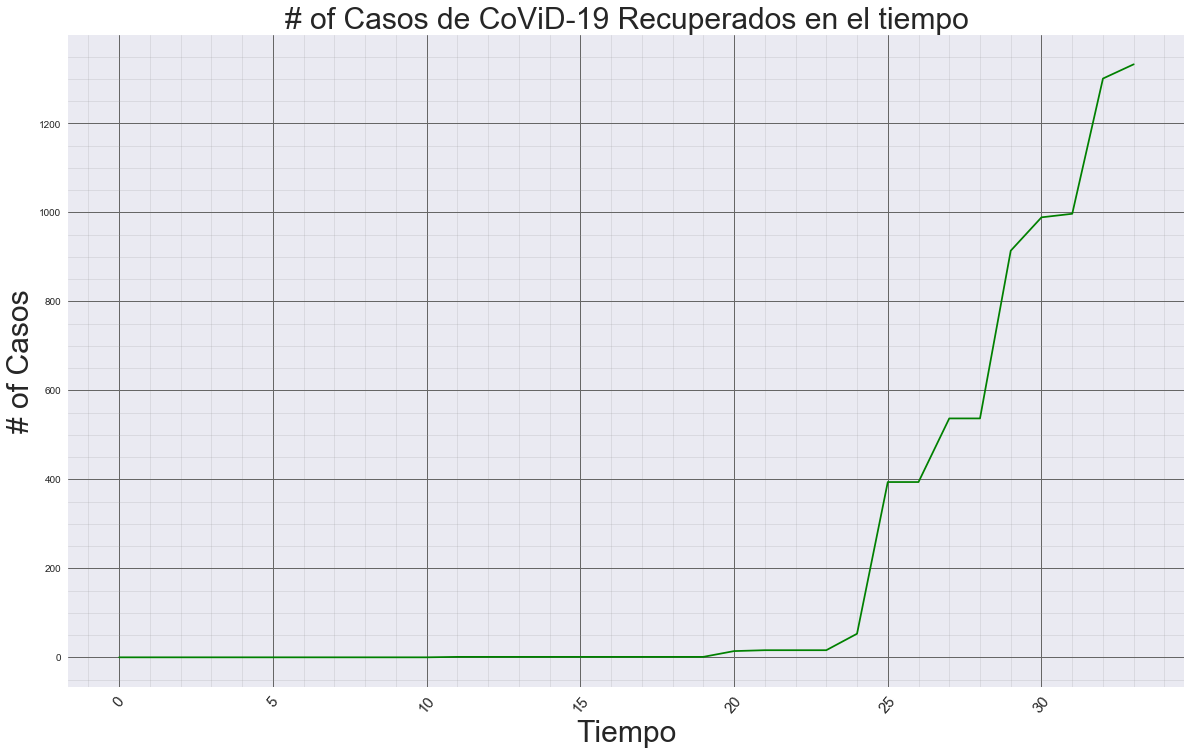

In [61]:
# Recovered over time
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_recovered, color='green')
plt.title('# of Casos de CoViD-19 Recuperados en el tiempo', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# of Casos', size=30)
plt.xticks(rotation=50, size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

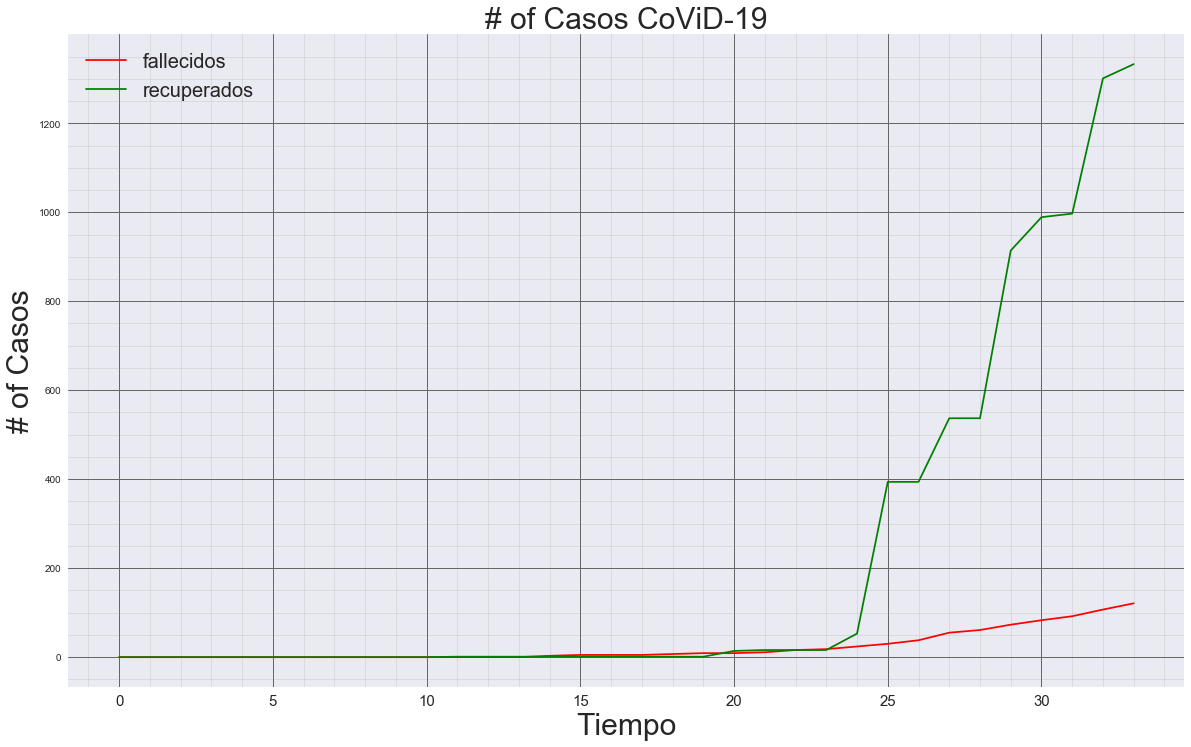

In [62]:
# Deaths vs Recoveries
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_total_deaths, color='r')
plt.plot(adjusted_dates, Peru_total_recovered, color='green')
plt.legend(['fallecidos', 'recuperados'], loc='best', fontsize=20)
plt.title('# of Casos CoViD-19', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# of Casos', size=30)
plt.xticks(size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

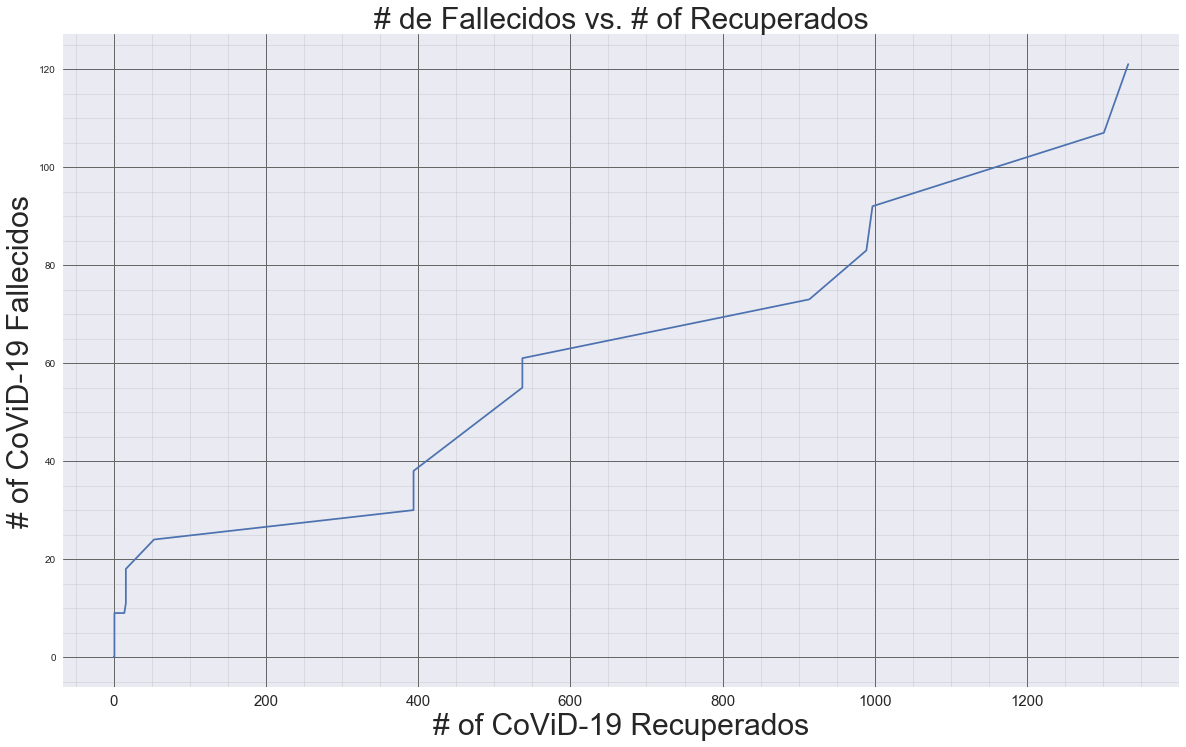

In [63]:
plt.figure(figsize=(20, 12))
plt.plot(Peru_total_recovered, Peru_total_deaths)
plt.title('# de Fallecidos vs. # of Recuperados', size=30)
plt.xlabel('# of CoViD-19 Recuperados', size=30)
plt.ylabel('# of CoViD-19 Fallecidos', size=30)
plt.xticks(size=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

In [64]:
# latest info
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]

# 10 Paises Sudamericanos (South American Countries)

In [65]:
unique_countries =  ['Peru','Brazil','Argentina','Ecuador','Chile','Colombia','Bolivia','Uruguay','Paraguay','Venezuela']

In [66]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [67]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
Brazil: 16170 cases
Chile: 5546 cases
Ecuador: 4450 cases
Peru: 4342 cases
Colombia: 2054 cases
Argentina: 1715 cases
Uruguay: 424 cases
Bolivia: 210 cases
Venezuela: 167 cases
Paraguay: 119 cases


In [68]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

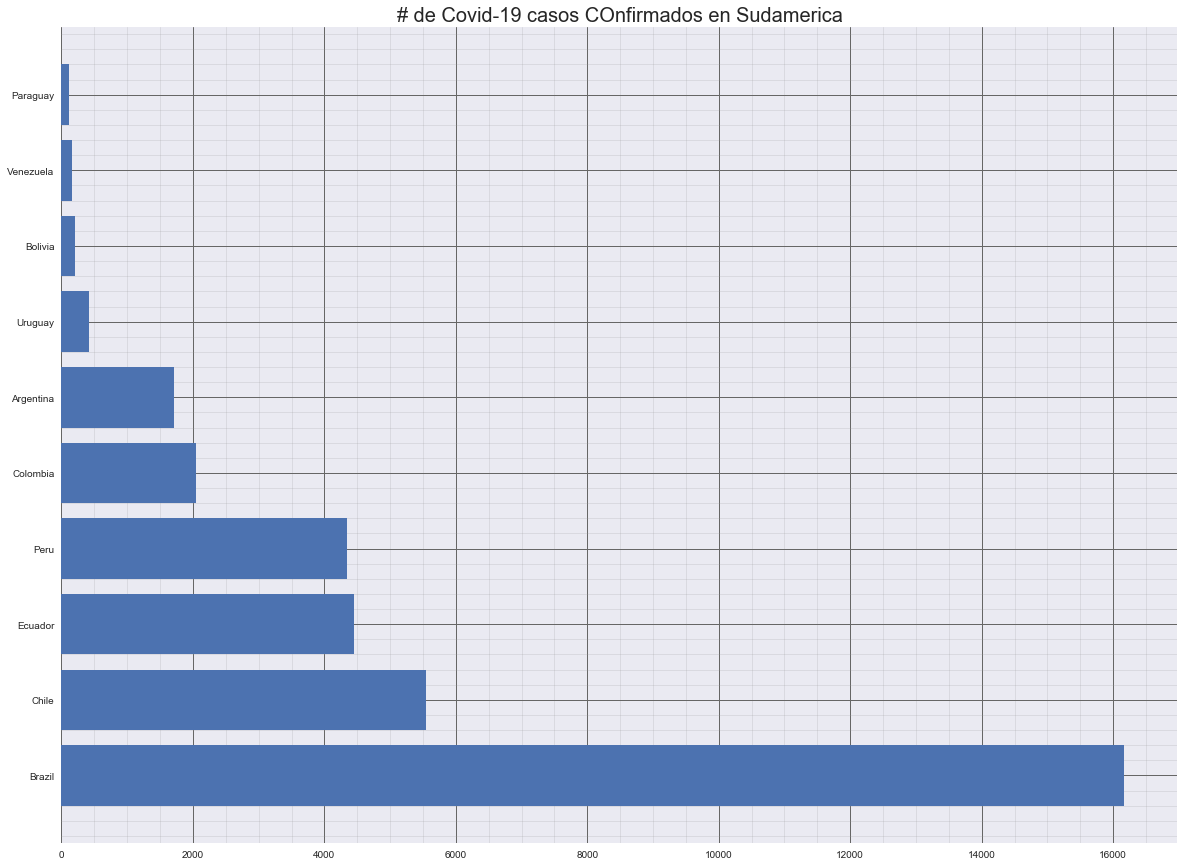

In [69]:
plt.figure(figsize=(20, 15))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# de Covid-19 casos COnfirmados en Sudamerica', size=20)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

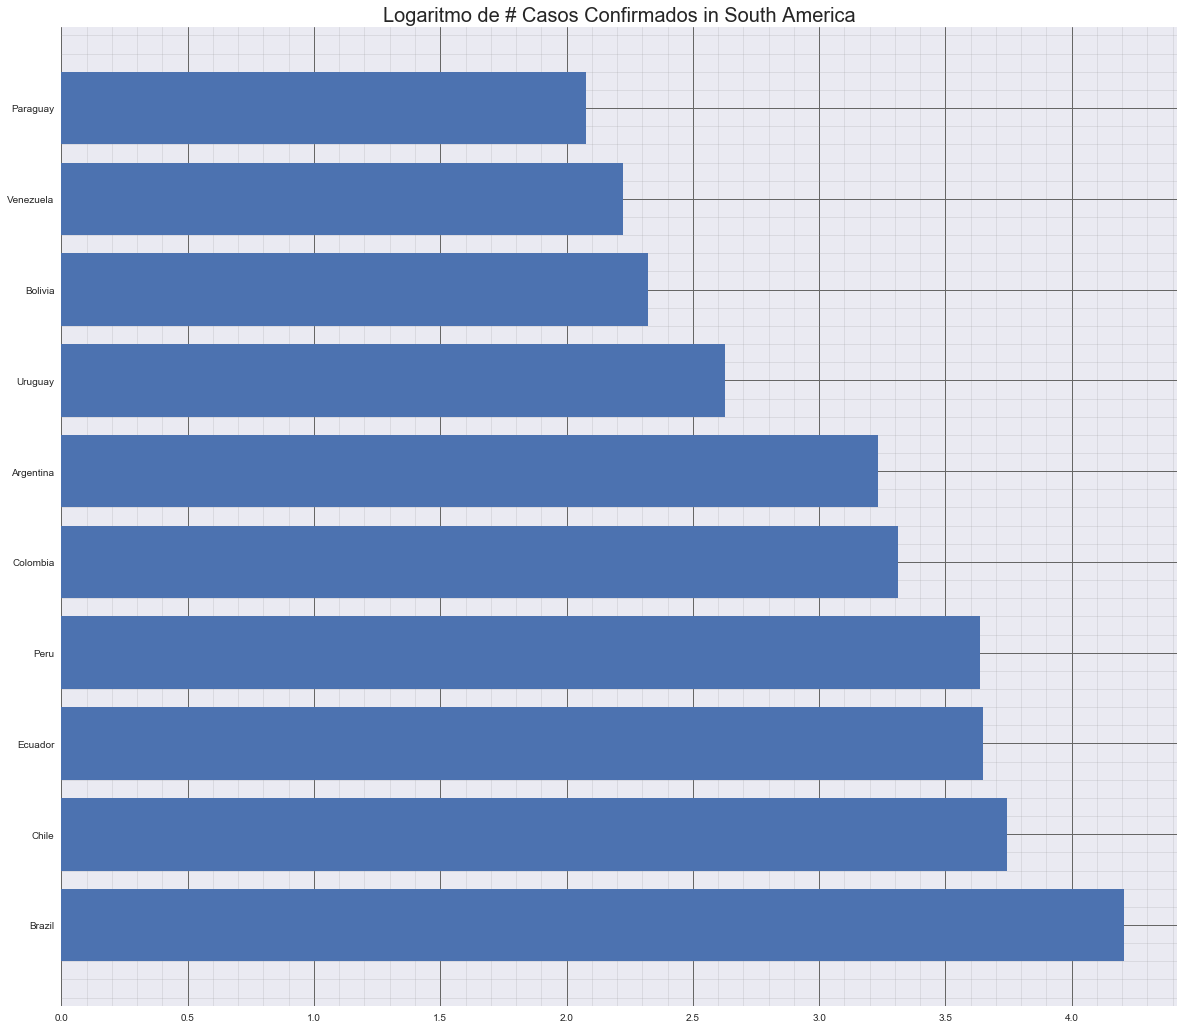

In [70]:
# lets look at it in a logarithmic scale 
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plt.figure(figsize=(20, 18))
plt.barh(visual_unique_countries, log_country_confirmed_cases)
plt.title('Logaritmo de # Casos Confirmados in South America', size=20)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

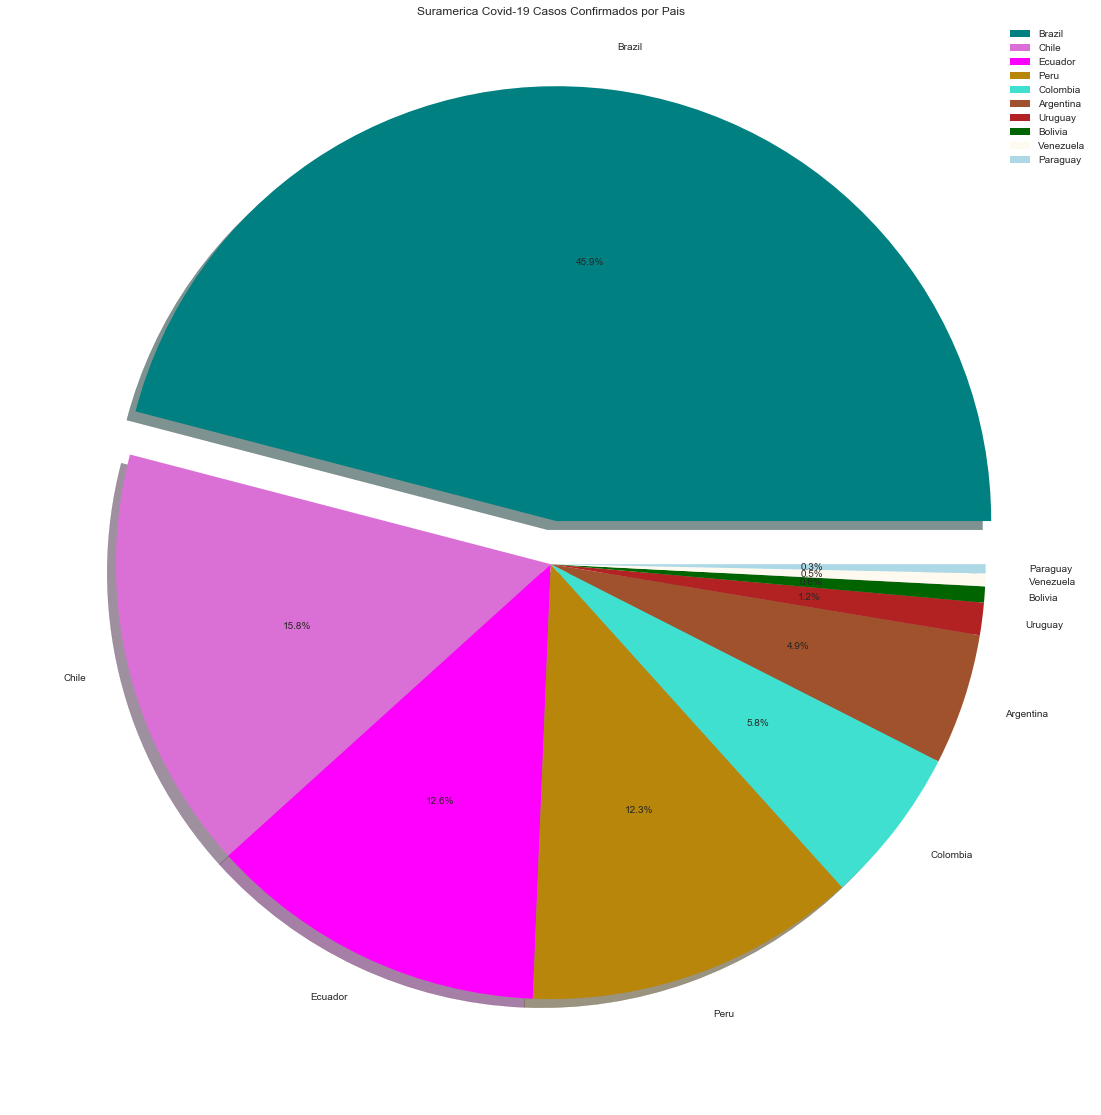

In [71]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Suramerica Covid-19 Casos Confirmados por Pais')
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(visual_confirmed_cases, colors=c, explode=explode, autopct='%1.1f%%', labels=visual_unique_countries, shadow=True)
plt.legend(visual_unique_countries, loc='best')
plt.show()

# SIR MODEL 

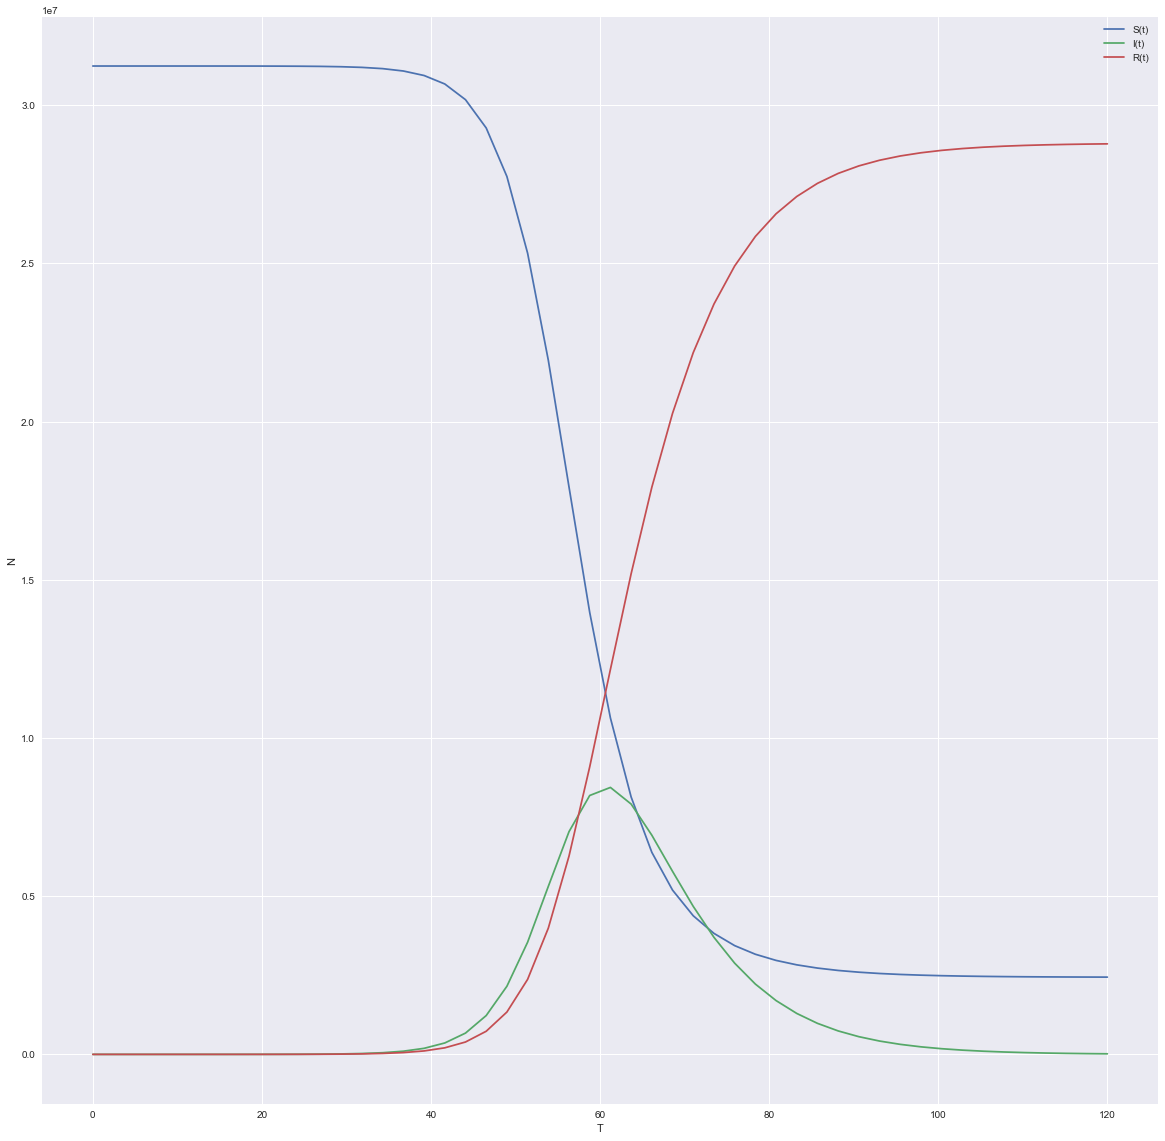

In [72]:
import matplotlib.pylab as plt
from scipy.integrate import odeint
import numpy as np

N = 31237385   # Censo del 2017
I = 6          # Asuncion de 6 infectados el dia 0 ( 06 de marzo)
S = N -I
R = 0

beta = 0.415 # infection rate 
gamma = 0.15 # recovery rate

# differential equations
def diff(sir, t):
    # sir[0] - S, sir[1] - I, sir[2] - R
    dsdt = - (beta * sir[0] * sir[1])/N
    didt = (beta * sir[0] * sir[1])/N - gamma * sir[1]
    drdt = gamma * sir[1]
    # print (dsdt + didt + drdt)
    dsirdt = [dsdt, didt, drdt]
    return dsirdt


# initial conditions
sir0 = (S, I, R)

# time points ( 60 days)
t = np.linspace(0, 120)

# solve ODE
# the parameters are, the equations, initial conditions, 
# and time steps (between 0 and 100)
sir = odeint(diff, sir0, t)

plt.figure(figsize=(20,20))

plt.plot(t, sir[:, 0], label='S(t)')
plt.plot(t, sir[:, 1], label='I(t)')
plt.plot(t, sir[:, 2], label='R(t)')

plt.legend()

plt.xlabel('T')
plt.ylabel('N')

# use scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()

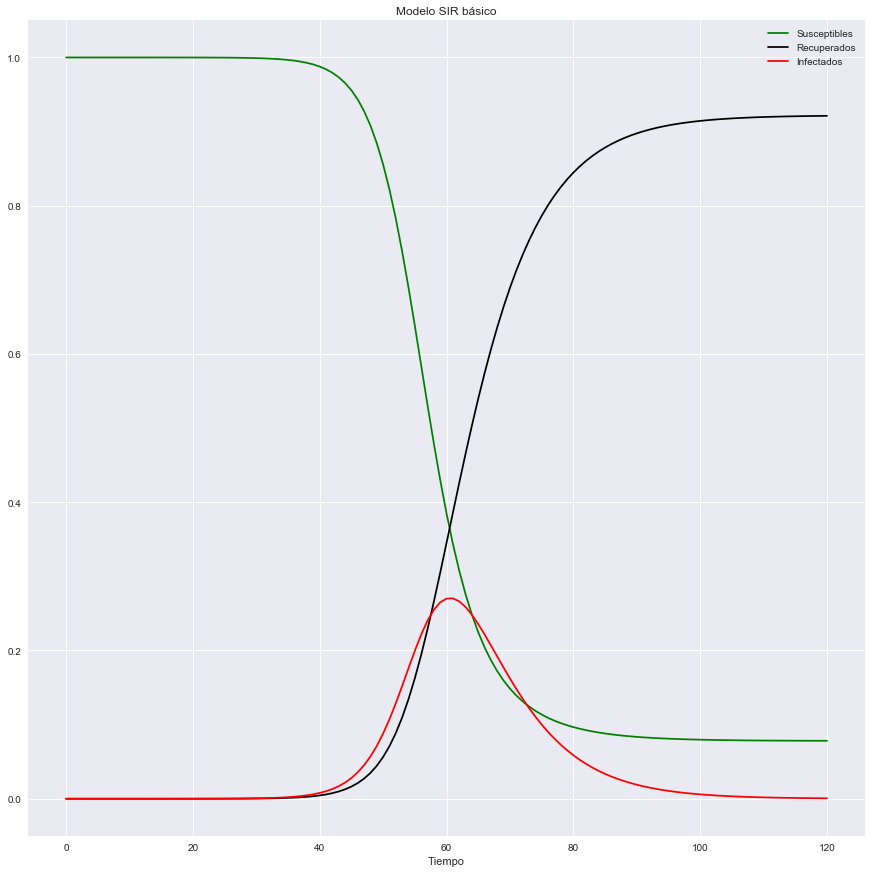

In [73]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
'''tamaño poblacional'''
N=1
beta=0.415  # previo analisis SIR matematico
gamma=0.15  # previo analisis SIR matematico
'''time step'''
TS=1.0 
ND=120.0
I0=1.91e-7 # Asumiendo 6 infectados inicialmente
S0=N-I0

INPUT = (S0, I0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((3))
    V = INP
    '''Las ecuaciones diferenciales'''
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Gráfica
plt.figure(figsize=(15,15))
pl.plot(RES[:,0]*N, '-g', label='Susceptibles')
pl.plot(RES[:,2]*N, '-k', label='Recuperados')
pl.plot(RES[:,1]*N, '-r', label='Infectados')
pl.legend(loc=0)
pl.title('Modelo SIR básico')
pl.xlabel('Tiempo')
pl.savefig('sirpy')

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]]
[[   1]
 [   1]
 [   6]
 [   7]
 [  11]
 [  11]
 [  15]
 [  28]
 [  38]
 [  43]
 [  86]
 [ 117]
 [ 145]
 [ 234]
 [ 234]
 [ 318]
 [ 363]
 [ 395]
 [ 416]
 [ 480]
 [ 580]
 [ 635]
 [ 671]
 [ 852]
 [ 950]
 [1065]
 [1323]
 [1414]
 [1595]
 [1746]
 [2281]
 [2561]
 [2954]
 [4342]]
[1.91000000e+01 2.49581539e+01 3.25954631e+01 4.25564362e+01
 5.55958613e+01 7.30928575e+01 9.54889054e+01 1.24995032e+02
 1.63160850e+02 2.13738429e+02 2.78886465e+02 3.64070688e+02
 4.75710189e+02 6.20868988e+02 8.10437809e+02 1.05727348e+03
 1.37777099e+03 1.79928577e+03 2.34447961e+03 3.05645280e+03
 3.98479223e+03 5.19481127e+03 6.77146921e+03 8.82672033e+03
 1.15055785e+04 1.49963296e+04 1.95461433e+04 2.54752394e+04
 3.31982498e+04 4.32609672e+04 5.63704366e+04 7.34451220e+04
 9.56789569e+04 1.24621643e+05]


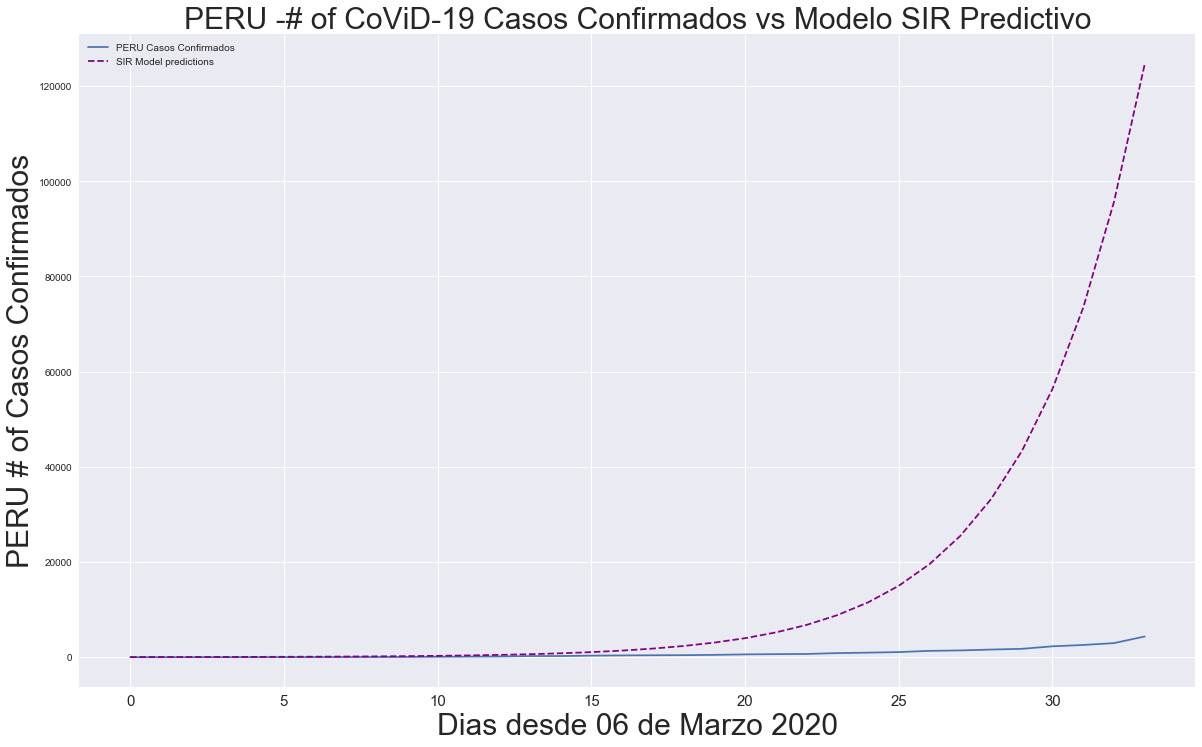

In [74]:
infectados_sir = RES[:,1]*10e7

print(adjusted_dates)
print(Peru_cases)
print(infectados_sir[:len(adjusted_dates)])


#df2 = pd.DataFrame.from_dict({"Day since March06":adjusted_dates,"Real_Infected":Peru_cases},orient = 'index')
#df2['Days']  = adjusted_dates
#df2['Real_Infected']  = Peru_cases
#df2['SIR_infected']  = infectados_sir[:len(Peru_cases)]
                                    
                                      
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, Peru_cases)
plt.plot(adjusted_dates, infectados_sir[:len(Peru_cases)], linestyle='dashed', color='purple')
#plt.plot(future_forecast, infectados_sir[:18], linestyle='dashed', color='purple')
plt.title('PERU -# of CoViD-19 Casos Confirmados vs Modelo SIR Predictivo', size=30)
plt.xlabel('Dias desde 06 de Marzo 2020', size=30)
plt.ylabel('PERU # of Casos Confirmados', size=30)
plt.legend(['PERU Casos Confirmados', 'SIR Model predictions'])
plt.xticks(size=15)
plt.show()